<a href="https://colab.research.google.com/github/Manisha2297/DataAndBases/blob/master/Homework1_Scaffold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://github.com/PadmajaVB/UnivAI_AI-3/blob/main/fig/univ.png?raw=1)

# AI-3: Language Models
## Homework 1: Embeddings and Language Models

**AI3 Cohort 1**<br/>
**Univ.AI**<br/>
**Instructor**: Pavlos Protopapas<br />
**Maximum Score**: 100

<hr style="height:2.4pt">

In [ ]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML

In [ ]:
# Import necessary libraries
import re
import os
import math
import zipfile
from collections import Counter
import numpy as np
import pandas as pd
import urllib.request
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import dot
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.layers import Input, Dense, Reshape, SimpleRNN
from tensorflow.keras.preprocessing.sequence import skipgrams
%matplotlib inline

### INSTRUCTIONS


- This homework is a jupyter notebook. Download and work on it on your local machine.

- This homework should be submitted in pairs.

- Ensure you and your partner together have submitted the homework only once. Multiple submissions of the same work will be penalised and will cost you 2 points.

- Please restart the kernel and run the entire notebook again before you submit.

- Running cells out of order is a common pitfall in Jupyter Notebooks. To make sure your code works restart the kernel and run the whole notebook again before you submit. 

- To submit the homework, either one of you upload the working notebook on edStem and click the submit button on the bottom right corner.

- Submit the homework well before the given deadline. Submissions after the deadline will not be graded.

- We have tried to include all the libraries you may need to do the assignment in the imports statement at the top of this notebook. We strongly suggest that you use those and not others as we may not be familiar with them.

- Comment your code well. This would help the graders in case there is any issue with the notebook while running. It is important to remember that the graders will not troubleshoot your code. 

- Please use .head() when viewing data. Do not submit a notebook that is **excessively long**. 

- In questions that require code to answer, such as "calculate the $R^2$", do not just output the value from a cell. Write a `print()` function that includes a reference to the calculated value, **not hardcoded**. For example: 
```
print(f'The R^2 is {R:.4f}')
```
- Your plots should include clear labels for the $x$ and $y$ axes as well as a descriptive title ("MSE plot" is not a descriptive title; "95 % confidence interval of coefficients of polynomial degree 5" is).

- **Ensure you make appropraite plots for all the questions it is applicable to, regardless of it being explicitly asked for.**

<hr style="height:2pt">

### Names of the people who worked on this homework together
#### Manisha R and Padmaja V Bhagwat

### **DATASET ACCESS**

**Please note that all the datasets used in this homework are available to you on edStem. You will find it in the resources tab (on the top right) next to your lessons tab. Additionally, some datasets have been provided in a form that will allow you to access it directly on google colab by uncommenting and running some cells.**

### **HOMEWORK QUIZ**

**For each part of the homework, there is an associated quiz on edStem. You are required to attempt that after completing each section of this homework. Please note that the quiz is one attempt only.**


![](https://github.com/PadmajaVB/UnivAI_AI-3/blob/main/fig/one_attempt.png?raw=1)

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">
    
## **PART 1 [35 points]: Language Modelling using ngrams**
<br />    

In the first part of the homework, you are expected to build a language model based on bigrams. You will develop your own sub-word tokenization to analyze dissaster messages from multiple natural disasters dataset. All the sentences are translated into english.


You have been tasked to develop a language model to complete messages that for some reason arrive incomplete to a radio station. Given the delicate situation, you will have to be extra careful. Each word in the sentence convey a lot of information, and improper handling of the data can mean harm to someone. 
    
    
</div>
    

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

## **PART 1: Questions**
<br />

### **1.1 [5 points] PREPROCESS THE DATASET**
<br />

**1.1.1** - Read in the dataset `disaster_response_messages_training.csv` and select only the column "message".
<br /><br />

**1.1.2** - Define a function `clean_data` that takes the data frame as input, converts the characters to lower case and removes any special characters that you might consider irrelevant,  adds the start token `<s>` and the end token `</s>` to every sentence (row) in the data frame and returns the processed data frame. 
<br /><br />


**1.1.3** - Split the dataset into train and test sets. The proportion should be 0.95 and 0.05, respectively. You will create the language model based on the train set and validate your results on the test set.
<br /><br />    



    
### **1.2 [8 points] TOKENIZE AND COUNT**
<br />
In this section, you will create three different tokenizers that you will build LM based on. The tokenization functions must divide the text into tokens, count their frequency and return a dictionary with a mapping of token to number.
    
**1.2.1** - Create your own tokenization function ('tokenizer_1') based on whitespace. Set the vocabulary size to 1000, including the `<UNK>` token for out of the vocabulary (OOV) words. 
<br /><br />

**1.2.2** - Create a second tokenization function ('tokenizer_2') based on whitespace, but do not limit the vocabulary size.
<br /><br />

**1.2.3** - Create a third tokenization function ('tokenizer_3') based on sub-words. You have to define a set of common sub-words in the English language, for example, the subtokens _ing_ and _n't_.
    
In this example, the sentence "_It is raining outside_" would be tokenized as [_It_, _is_, _rain_, _ing_, _outside_ ].
<br /><br />
    
    
    
### **1.3 [6 points] CONSTRUCTING BIGRAMS**
<br />

**1.3.1** - Using each of the tokenizer functions you created, split each sentence into tokens in their numerical representation. 
<br /><br />

**1.3.2** - Count the bigrams in the dataset for each tokenizer and divide them by the total number of bigrams. This will give you the probability of each bigram.
<br /><br />
    
    
    
### **1.4 [8 points] PREDICTING THE NEXT WORDS**
<br />

**1.4.1** - Simulate the incomplete messages dividing each sentence of the **test** set into two. For this, split each sentence in a 3:1 ratio. The first $75\%$ of a sentence will represent the correct message, and the last $25\%$ will convey the missing information. You will not give this 25% to your model, it is kept hidden. This 25% will only be used to evaluate the predictions of your language model.
    
For example in the sentence: *"I will go out on a vacation, now that my semester ended."*

The first 75% will be *"I will go out on a vacation, now"*

The last 25% will be *"that my semeter ended"*

Your aim is to predict the last part by giving your model the first "part" of the sentence.


Note that in an n-gram language model, only the last $n-1$ words are used to make a prediction. For example, for the above sentence, if you are using bigrams, the input to your model would only be "now" and you are expected to predict "that".
    
<br /><br />    
    
**1.4.2** - Given 5 sentences from the previous question (test set), predict the next word. 
Append this predicted word to the input sequence and predict the next one. Repeat this process until you reach the 10th token or the end of a sentence. Compare your results qualitatively with the original sentences. Do the results make sense wrt the context and semantics?

Repeat this for all the models built using different tokenization techniques.
<br /><br />

**1.4.3** - Repeat the same exercise, for all 3 models, but this time, the next token will be sampled from a distribution given by the bigram frequency. Compare and comment on the results?


*Hint:* In a model of two bigrams with frequencies 0.7 and 0.3, a deterministic prediction will only predict the first bigram. Sampling from a distribution, will enable the model to predict the second bigram with a probability of 0.3. In this way we can still predict infrequent tokens. 
<br /><br />
    

### **1.5 [5 points] EVALUATE THE LANGUAGE MODELS**
<br />

    
**1.5.1** - For each of the models built using different tokenization techniques, compute the average perplexity in the test set (part 1.1.3). Perform smoothing on the bigram models. Based on the perplexity, which model is better?
<br /><br />

**1.5.2** - Given the perplexities, which model do you think is better? Why do you think so? Does this reflect the quality of the prediction as seen in part 1.4? 
 What is the effect of UNK words?

<br /><br />

### **1.6 [3 points] HOMEWORK QUIZ**
<br />
After attempting this part of the homework, answer the questions on edStem. All the questions depend on this part of the homework and you will not be able to answer them without attempting this part.

<br /><br />

</div>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">
    
## **PART 1: Solutions**
    
### **1.1 [5 points] PREPROCESS THE DATASET**
<br />

**1.1.1** - Read in the dataset `disaster_response_messages_training.csv` and select only the column "message".
<br /><br />

    
</div>

In [ ]:
# Your code here
raw_data = pd.read_csv('/content/drive/MyDrive/UnivAI/Univ AI 3/Homework 1 - Part 1 Dataset.csv')
raw_data = raw_data[['message']]

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
raw_data.head()

,message
0,Weather update - a cold front from Cuba that c...
1,Is the Hurricane over or is it not over
2,"says: west side of Haiti, rest of the country ..."
3,Information about the National Palace-
4,Storm at sacred heart of jesus


<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">
    
**1.1.2** - Define a function `clean_data` that takes the data frame as input, converts the characters to lower case and removes any special characters that you might consider irrelevant,  adds the start token `<s>` and the end token `</s>` to every sentence (row) in the data frame and returns the processed data frame. 
    
</div>

In [ ]:
def preprocess_text(text):
  clean_text = text.lower()
  # remove special characters - basically anything that is not a letter or a space
  clean_text = re.sub(r'[^a-z0-9\s]+','', clean_text)
  clean_text = '<s> '+clean_text+' </s>'
  return clean_text

In [ ]:
# Your code here
def clean_data_1(dataframe):
  dataframe['message'] = dataframe['message'].apply(preprocess_text) 
  return dataframe

In [ ]:
# clean the data
df = clean_data_1(raw_data)

In [ ]:
df.head()

,message
0,<s> weather update a cold front from cuba tha...
1,<s> is the hurricane over or is it not over </s>
2,<s> says west side of haiti rest of the countr...
3,<s> information about the national palace </s>
4,<s> storm at sacred heart of jesus </s>


<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

**1.1.3** - Split the dataset into train and test sets. The proportion should be 0.95 and 0.05, respectively. You will create the language model based on the train set and validate your results on the test set.

</div>

In [ ]:
# Your code here
index = np.unique(df.index)
train_index, val_index = train_test_split(index, train_size=0.95, random_state=66)

df_train = df.loc[train_index]
df_val = df.loc[val_index]

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

### **1.2 [8 points] TOKENIZE AND COUNT**
<br />
In this section, you will create three different tokenizers and build an LM based on each one of them. The tokenization functions must divide the text into tokens, count their frequency and return a dictionary with a mapping of token to number.

    
</div>

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

**1.2.1** - Create your own tokenization function ('tokenizer_1') based on whitespace. Set the vocabulary size to 1000, including the `<UNK>` token for out of the vocabulary (OOV) words. 
<br /><br />
    
</div> 

In [ ]:
# Fill in to complete this function 
def tokenizer_1(text_corpus, vocabulary_size):
    """Process raw inputs into a dataset."""
    count = [['UNK', -1]]
    count.extend(Counter(text_corpus.split()).most_common(vocabulary_size-1))
    
    dictionary={}
    # For all words in count, assign a token (you can use a for loop) 
    for i, tup in enumerate(count):
        dictionary[tup[0]] = i
        
    # Make a new list of tokens associated with words    
    data = []
    # Initialize a counter for 'UNK' values 
    unk_count = 0
    
    # For all words in corpus, find the associated token, and append to 
    # the 'data' variable defined above
    for word in text_corpus:
        if word in dictionary:
            token = dictionary[word]
        # If word is not in dictionary, it is 'out of vocabulary'
        # So we need to assign it the zero token and
        # update the count of the 'UNK' token
        else:
            token = 0  
            unk_count += 1
            
        # Append token to data 
        data.append(token)
        
    # We can now set the count of 'UNK' tokens in the corpus
    count[0][1] = unk_count
    
    # A reverse dictionary takes you from tokens to words
    # Eg. if dictionary['Ignacio'] == 44
    # reverse_dictionary[44] == 'Ignacio'
    reversed_dictionary = {v:k for k,v in dictionary.items()}
    
    return data, count, dictionary, reversed_dictionary

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

**1.2.2** - Create a second tokenization function ('tokenizer_2') based on whitespace, but do not limit the vocabulary size.
<br /><br />
    
</div>

In [ ]:
# Fill in to complete this function 
def tokenizer_2(text_corpus):
    """Process raw inputs into a dataset."""
    count = []
    count.extend(Counter(text_corpus.split()).most_common())
    
    dictionary={}
    for i, tup in enumerate(count):
        dictionary[tup[0]] = i
        
    # Make a new list of tokens associated with words    
    data = []
    for word in text_corpus:
        if word in dictionary:
            token = dictionary[word]
        else:
            token = 0  
            
        # Append token to data 
        data.append(token)

    dictionary['UNK']=len(text_corpus.split())
    reversed_dictionary = {v:k for k,v in dictionary.items()}
    
    return data, count, dictionary, reversed_dictionary

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

**1.2.3** - Create a third tokenization function ('tokenizer_3') based on sub-words. You have to define a set of common sub-words in the English language, for example, the subtokens _ing_ and _n't_.
    
In this example, the sentence "_It is raining outside_" would be tokenized as [_It_, _is_, _rain_, _ing_, _outside_ ].
<br /><br />
    
</div>

In [ ]:
def sub_word_tokenizer(text_corpus):
  common_prefix = [ 'pre', 'un', 'under', 'over', 'post', 'ir', 'in', 'sub']
  common_suffix = ['ing','ly','ed', 'n\'t','er','est', 'es', 'ful']

  word_seq = text_corpus.split()
  results = []
  for word in word_seq:
    filtered_prefix = list(filter(word.startswith, common_prefix))
    filtered_suffix = list(filter(word.endswith, common_suffix))
    if len(filtered_prefix)>0:
      results.extend(re.split(rf"^({filtered_prefix[0]})",word))
    if len(filtered_suffix)>0:
      results.extend(re.split(rf"({filtered_suffix[0]})$",word))
    if len(filtered_prefix)==0 and len(filtered_suffix)==0:
      results.append(word)
  
  subword_tokens = list(filter(None, results))
  return subword_tokens

In [ ]:
# Your code here
def tokenizer_3(text_corpus):
  subword_tokens = sub_word_tokenizer(text_corpus)
  count = []
  count.extend(Counter(subword_tokens).most_common())

  dictionary={}
  for i, tup in enumerate(count):
      dictionary[tup[0]] = i
      
  # Make a new list of tokens associated with words    
  data = []
  for word in text_corpus:
      if word in dictionary:
          token = dictionary[word]
      else:
          token = 0  
          
      # Append token to data 
      data.append(token)
      
  dictionary['UNK']=len(text_corpus.split())
  reversed_dictionary = {v:k for k,v in dictionary.items()}

  return data, count, dictionary, reversed_dictionary



<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

### **1.3 [6 points] CONSTRUCTING BIGRAMS**
<br />

**1.3.1** - Using each of the tokenizer functions you created, split each sentence into tokens in their numerical representation. 
<br /><br />
    
</div>

In [ ]:
def get_tok_sequence(text, vocab_dict):
  seq=[]
  for word in text.split():
    if word in vocab_dict.keys():
      seq.append(vocab_dict[word])
    else:
      seq.append(vocab_dict['UNK'])
  return seq

In [ ]:
text_corpus = ""
for text in  df['message'].values:
  text_corpus = text_corpus + " "+ text

In [ ]:
data, count, dictionary, reversed_dictionary  = tokenizer_1(text_corpus,1000)

In [ ]:
df_tok1 = pd.DataFrame(df['message'].apply(get_tok_sequence, vocab_dict=dictionary), columns=['message'])

In [ ]:
df_tok1.head()

,message
0,"[2, 187, 0, 8, 437, 960, 23, 0, 16, 130, 551, ..."
1,"[2, 11, 1, 133, 80, 55, 11, 29, 36, 80, 3]"
2,"[2, 512, 336, 979, 6, 67, 0, 6, 1, 84, 248, 4,..."
3,"[2, 76, 60, 1, 165, 0, 3]"
4,"[2, 138, 26, 0, 980, 6, 0, 3]"


In [ ]:
data_2, count_2, dictionary_2, reversed_dictionary_2  = tokenizer_2(text_corpus)
df_tok2 = pd.DataFrame(df['message'].apply(get_tok_sequence, vocab_dict=dictionary_2), columns=['message'])

In [ ]:
df_tok2.head()

,message
0,"[1, 186, 1959, 7, 436, 959, 22, 2661, 15, 129,..."
1,"[1, 10, 0, 132, 79, 54, 10, 28, 35, 79, 2]"
2,"[1, 511, 335, 978, 5, 66, 1327, 5, 0, 83, 247,..."
3,"[1, 75, 59, 0, 164, 3300, 2]"
4,"[1, 137, 25, 15281, 979, 5, 1647, 2]"


In [ ]:
def get_subword_tok_sequence(text, vocab_dict):
  subword_tokens = sub_word_tokenizer(text)
  seq=[]
  for word in subword_tokens:
    if word in vocab_dict.keys():
      seq.append(vocab_dict[word])
    else:
      seq.append(vocab_dict['UNK'])
  return seq

In [ ]:
data_3, count_3, dictionary_3, reversed_dictionary_3 = tokenizer_3(text_corpus)
df_tok3 = pd.DataFrame(df['message'].apply(get_subword_tok_sequence, vocab_dict=dictionary_3), columns=['message'])

In [ ]:
df_tok3.head()

,message
0,"[1, 213, 10, 1955, 11, 435, 1001, 29, 2606, 20..."
1,"[1, 15, 0, 151, 67, 91, 10, 62, 15, 36, 35, 67..."
2,"[1, 561, 236, 54, 502, 9, 75, 149, 54, 9, 0, 9..."
3,"[1, 3, 86, 68, 0, 183, 3186, 2]"
4,"[1, 156, 31, 13824, 4, 1039, 9, 1659, 2]"


<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

**1.3.2** - Count the bigrams in the dataset for each tokenizer and divide them by the total number of bigrams. This will give you the probability of each bigram.
<br /><br />
    
</div>

In [ ]:
# Your code here
def get_bigrams(df):
  bigrams = []
  for seq in df['message'].values:
    bigrams.extend([(seq[i],seq[i+1]) for i in range(1,len(seq[1:-1]))])
  bigrams_count_dict = Counter(bigrams)
  return bigrams_count_dict


In [ ]:
def get_bigram_prob(bigrams_count_dict):
  first_gram_count = {}
  for k, v in bigrams_count_dict.items():
    if k[0] in first_gram_count.keys():
      first_gram_count[k[0]] += v
    else:
      first_gram_count[k[0]] = v

  bigram_prob_dict = {k: v / first_gram_count[k[0]] for k, v in bigrams_count_dict.items()}
  return bigram_prob_dict

In [ ]:
# Bigram probability for tokenizer1  
bigrams_count_dict_tok1 = get_bigrams(df_tok1)
bigram_prob_dict_tok1 = get_bigram_prob(bigrams_count_dict_tok1)

In [ ]:
max(bigrams_count_dict_tok1, key=bigrams_count_dict_tok1.get)

(0, 0)

In [ ]:
# Bigram probability for tokenizer2  
bigrams_count_dict_tok2 = get_bigrams(df_tok2)
bigram_prob_dict_tok2 = get_bigram_prob(bigrams_count_dict_tok2)

In [ ]:
max(bigrams_count_dict_tok2, key=bigrams_count_dict_tok2.get)

(6, 0)

In [ ]:
# Bigram probability for tokenizer3  
bigrams_count_dict_tok3 = get_bigrams(df_tok3)
bigram_prob_dict_tok3 = get_bigram_prob(bigrams_count_dict_tok3)

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

### **1.4 [8 points] PREDICTING THE NEXT WORDS**
<br />

**1.4.1** - Simulate the incomplete messages dividing each sentence of the **test** set into two. For this, split each sentence in a 3:1 ratio. The first $75\%$ of a sentence will represent the correct message, and the last $25\%$ will convey the missing information. You will not give this 25% to your model, it is kept hidden. This 25% will only be used to evaluate the predictions of your language model.
    
For example in the sentence: *"I will go out on a vacation, now that my semester ended."*

The first 75% will be *"I will go out on a vacation, now"*

The last 25% will be *"that my semeter ended"*

Your aim is to predict the last part by giving your model the first "part" of the sentence.


Note that in an n-gram language model, only the last $n-1$ words are used to make a prediction. For example, for the above sentence, if you are using bigrams, the input to your model would only be "now" and you are expected to predict "that".
    
<br /><br />   
    
</div>

In [ ]:
# Your code here
def split_sent(word_seq):
  msg_len = round(0.75*len(word_seq))
  msg = word_seq[:msg_len]
  missing_info = word_seq[msg_len:]
  return msg, missing_info

In [ ]:
# get word sequence based on tokenizer_1 for test set 
df_val_tok1 = pd.DataFrame(df_val['message'].apply(get_tok_sequence, vocab_dict=dictionary), columns=['message'])

# get word sequence based on tokenizer_2 for test set 
df_val_tok2 = pd.DataFrame(df_val['message'].apply(get_tok_sequence, vocab_dict=dictionary_2), columns=['message'])

# get word sequence based on tokenizer_3 for test set 
df_val_tok3 = pd.DataFrame(df_val['message'].apply(get_subword_tok_sequence, vocab_dict=dictionary_3), columns=['message'])

In [ ]:
# split the msg in 3:1 ratio
def split_sent_df(df):
  message, missing_info = [],[]
  for text_seq in df['message'].values:
    x, y = split_sent(text_seq)
    message.append(x)
    missing_info.append(y)

  df_split = pd.DataFrame({'message':message, 'missing_info':missing_info})
  return df_split
  

In [ ]:
df_val_tok1_split = split_sent_df(df_val_tok1)
df_val_tok2_split = split_sent_df(df_val_tok2)
df_val_tok3_split = split_sent_df(df_val_tok3)

In [ ]:
df_val_tok2_split.head()

,message,missing_info
0,"[1, 148, 0, 4949, 941, 1663, 22, 25936, 41, 35...","[0, 742, 4, 573, 5904, 55, 1823, 2]"
1,"[1, 60, 698, 35, 18697, 172, 316, 34]","[15, 2]"
2,"[1, 60, 86, 1130, 9, 7, 179, 48, 1158, 29]","[8, 256, 2]"
3,"[1, 211, 4, 382, 2201, 64, 53, 84, 1092, 19, 1...","[31930, 31931, 31932, 3, 31933, 2]"
4,"[1, 251, 476, 674, 26, 1040, 13348, 3292, 5, 8...","[13349, 694, 5565, 15, 453, 26009, 5156, 5498,..."


In [ ]:
df_val_tok3_split.head()

,message,missing_info
0,"[1, 172, 0, 1748, 993, 1679, 29, 23905, 51, 35...","[0, 714, 8, 7, 621, 10, 3997, 63, 1841, 2]"
1,"[1, 69, 749, 35, 22, 17039, 195, 339]","[41, 20, 2]"
2,"[1, 69, 99, 550, 5, 13, 11, 202, 56, 1199]","[37, 12, 155, 2]"
3,"[1, 230, 5, 7, 423, 616, 8, 73, 61, 97, 1145, ...","[6, 29337, 29338, 29339, 6, 29340, 2]"
4,"[1, 283, 508, 740, 33, 796, 4, 12068, 3178, 9,...","[892, 12069, 518, 5166, 20, 3, 500, 23972, 478..."


<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">


**1.4.2** - Given 5 sentences from the previous question (test set), predict the next word. 
Append this predicted word to the input sequence and predict the next one. Repeat this process until you reach the 10th token or the end of a sentence. Compare your results qualitatively with the original sentences. Do the results make sense wrt the context and semantics?

Repeat this for all the models built using different tokenization techniques.
<br /><br />
    
</div>

In [ ]:
def predict_missing_word_freq_based(msg, missing_info, dictionary, reversed_dictionary, count_dict):
  missing_text_actual = ""
  for seq in missing_info[:min(10, len(missing_info))]:
    missing_text_actual += reversed_dictionary[seq] + " "

  missing_text_predicted=''
  message = msg.copy()
  for i in range(min(10, len(missing_info))):
    last_word = message[-1]
    keyword_dict = {k[1]:v for k,v in count_dict.items() if k[0] == last_word}

    next_word = max(keyword_dict, key=keyword_dict.get)
    message.append(next_word)
    missing_text_predicted += reversed_dictionary[next_word] + " "

  return missing_text_actual, missing_text_predicted

In [ ]:
def print_predicted_seq(df, dictionary, reversed_dictionary, count_dict):
  for i in range(5):
    actual, pred = predict_missing_word_freq_based(df['message'][i], df['missing_info'][i], dictionary, reversed_dictionary, count_dict)
    print("==== Sentence {} ====".format(i+1))
    incomplete_message= " ".join([reversed_dictionary[seq] for seq in df['message'][i]])
    print("Input Message :", incomplete_message)
    print("Actual: ",actual)
    print("Predicted: ",pred)
    print()

In [ ]:
print_predicted_seq(df_val_tok1_split, dictionary, reversed_dictionary, bigrams_count_dict_tok1)

==== Sentence 1 ====
Input Message : <s> while the UNK line UNK from UNK was not UNK some UNK were made to the UNK to UNK for more UNK UNK of
Actual:  the lines to better UNK their UNK </s> 
Predicted:  UNK UNK UNK UNK UNK UNK UNK UNK 

==== Sentence 2 ====
Input Message : <s> if u not UNK just tell me
Actual:  that </s> 
Predicted:  UNK UNK 

==== Sentence 3 ====
Input Message : <s> if im UNK for a job which UNK can
Actual:  i call </s> 
Predicted:  i am a 

==== Sentence 4 ====
Input Message : <s> according to wfp UNK no more than UNK people have UNK in three temporary UNK camps near UNK and
Actual:  UNK UNK UNK and UNK </s> 
Predicted:  UNK UNK UNK UNK UNK UNK 

==== Sentence 5 ====
Input Message : <s> pakistan air force has UNK UNK UNK of relief UNK including tents blankets dry UNK medicines in the disaster UNK UNK and UNK areas during last six UNK relief activities was UNK by various
Actual:  UNK transport UNK that include UNK UNK UNK and UNK 
Predicted:  UNK UNK UNK UNK UNK UNK U

In [ ]:
print_predicted_seq(df_val_tok2_split, dictionary_2, reversed_dictionary_2, bigrams_count_dict_tok2)

==== Sentence 1 ====
Input Message : <s> while the actual line data from gaul was not modified some adjustments were made to the data to allow for more finegrained styling of
Actual:  the lines to better reflect their status </s> 
Predicted:  the earthquake in the earthquake in the earthquake 

==== Sentence 2 ====
Input Message : <s> if u not underst just tell me
Actual:  that </s> 
Predicted:  to the 

==== Sentence 3 ====
Input Message : <s> if im looking for a job which ngo can
Actual:  i call </s> 
Predicted:  i am a 

==== Sentence 4 ====
Input Message : <s> according to wfp estimates no more than 10000 people have remained in three temporary accomodation camps near gisenyi and
Actual:  ruhengeri nkamira mkwero and mudende </s> 
Predicted:  the earthquake in the earthquake in 

==== Sentence 5 ====
Input Message : <s> pakistan air force has delivered 163000 kg of relief cargo including tents blankets dry ration medicines in the disaster stricken muzaffarabad and adjacent areas du

In [ ]:
print_predicted_seq(df_val_tok3_split, dictionary_3, reversed_dictionary_3, bigrams_count_dict_tok3)

==== Sentence 1 ====
Input Message : <s> while the actual line data from gaul was not modifi ed some adjustments were made to the data to allow for more finegrain ed styl ing of
Actual:  the lin es to bett er reflect their status </s> 
Predicted:  the in the in the in the in the in 

==== Sentence 2 ====
Input Message : <s> if u not un derst just tell
Actual:  me that </s> 
Predicted:  me to the 

==== Sentence 3 ====
Input Message : <s> if im look ing for a job which ngo
Actual:  can i call </s> 
Predicted:  that the in the 

==== Sentence 4 ====
Input Message : <s> accord ing to wfp estimat es no more than 10000 people have remain ed in three temporary accomodation camps near gisenyi
Actual:  and ruhengeri nkamira mkwero and mudende </s> 
Predicted:  and the in the in the in 

==== Sentence 5 ====
Input Message : <s> pakistan air force has deliver ed 163000 kg of relief cargo in cluding includ ing tents blankets dry ration medicin es in the disast er stricken muzaffarabad and adjacen

**We can clearly see that the perdicted word doesn't make sense wrt the context and semantics, since its always predicting the most frequent word.**

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

**1.4.3** - Repeat the same exercise, for all 3 models, but this time, the next token will be sampled from a distribution given by the bigram frequency. Compare and comment on the results?


*Hint:* In a model of two bigrams with frequencies 0.7 and 0.3, a deterministic prediction will only predict the first bigram. Sampling from a distribution, will enable the model to predict the second bigram with a probability of 0.3. In this way we can still predict infrequent tokens. 
<br /><br />
    
</div>

In [ ]:
# Your code here
def predict_next_word(msg, missing_info, dictionary, reversed_dictionary, probability_dict):
  missing_text_actual = ""
  for seq in missing_info[:min(10, len(missing_info))]:
    missing_text_actual += reversed_dictionary[seq] + " "

  missing_text_predicted=''
  message = msg.copy()
  for i in range(min(10, len(missing_info))):
    last_word = message[-1]
    probability_list = [v for k,v in probability_dict.items() if k[0] == last_word]
    next_word_list = [k[1] for k,v in probability_dict.items() if k[0] == last_word]

    next_word = np.random.choice(next_word_list, p=probability_list)
    message.append(next_word)
    missing_text_predicted += reversed_dictionary[next_word] + " "

  return missing_text_actual, missing_text_predicted


In [ ]:
def print_predicted_seq(df, dictionary, reversed_dictionary, probability_dict):
  for i in range(5):
    actual, pred = predict_next_word(df['message'][i], df['missing_info'][i], dictionary, reversed_dictionary, probability_dict)
    print("==== Sentence {} ====".format(i+1))
    incomplete_message= " ".join([reversed_dictionary[seq] for seq in df['message'][i]])
    print("Input Message :", incomplete_message)
    print("Actual: ",actual)
    print("Predicted: ",pred)
    print()

In [ ]:
print_predicted_seq(df_val_tok1_split, dictionary, reversed_dictionary, bigram_prob_dict_tok1)

==== Sentence 1 ====
Input Message : <s> while the UNK line UNK from UNK was not UNK some UNK were made to the UNK to UNK for more UNK UNK of
Actual:  the lines to better UNK their UNK </s> 
Predicted:  UNK good morning a person UNK UNK a 

==== Sentence 2 ====
Input Message : <s> if u not UNK just tell me
Actual:  that </s> 
Predicted:  are in 

==== Sentence 3 ====
Input Message : <s> if im UNK for a job which UNK can
Actual:  i call </s> 
Predicted:  send to UNK 

==== Sentence 4 ====
Input Message : <s> according to wfp UNK no more than UNK people have UNK in three temporary UNK camps near UNK and
Actual:  UNK UNK UNK and UNK </s> 
Predicted:  roads used to improve UNK also 

==== Sentence 5 ====
Input Message : <s> pakistan air force has UNK UNK UNK of relief UNK including tents blankets dry UNK medicines in the disaster UNK UNK and UNK areas during last six UNK relief activities was UNK by various
Actual:  UNK transport UNK that include UNK UNK UNK and UNK 
Predicted:  communitie

In [ ]:
print_predicted_seq(df_val_tok2_split, dictionary_2, reversed_dictionary_2, bigram_prob_dict_tok2)

==== Sentence 1 ====
Input Message : <s> while the actual line data from gaul was not modified some adjustments were made to the data to allow for more finegrained styling of
Actual:  the lines to better reflect their status </s> 
Predicted:  cyclones and hundreds of tools that we were 

==== Sentence 2 ====
Input Message : <s> if u not underst just tell me
Actual:  that </s> 
Predicted:  where unhcr 

==== Sentence 3 ====
Input Message : <s> if im looking for a job which ngo can
Actual:  i call </s> 
Predicted:  go through nutrition 

==== Sentence 4 ====
Input Message : <s> according to wfp estimates no more than 10000 people have remained in three temporary accomodation camps near gisenyi and
Actual:  ruhengeri nkamira mkwero and mudende </s> 
Predicted:  little thing which it is job 

==== Sentence 5 ====
Input Message : <s> pakistan air force has delivered 163000 kg of relief cargo including tents blankets dry ration medicines in the disaster stricken muzaffarabad and adjacent are

In [ ]:
print_predicted_seq(df_val_tok3_split, dictionary_3, reversed_dictionary_3, bigram_prob_dict_tok3)

==== Sentence 1 ====
Input Message : <s> while the actual line data from gaul was not modifi ed some adjustments were made to the data to allow for more finegrain ed styl ing of
Actual:  the lin es to bett er reflect their status </s> 
Predicted:  shops just to l ed fishery sector in haiti what 

==== Sentence 2 ====
Input Message : <s> if u not un derst just tell
Actual:  me that </s> 
Predicted:  me the hudson 

==== Sentence 3 ====
Input Message : <s> if im look ing for a job which ngo
Actual:  can i call </s> 
Predicted:  are sufer ing can 

==== Sentence 4 ====
Input Message : <s> accord ing to wfp estimat es no more than 10000 people have remain ed in three temporary accomodation camps near gisenyi
Actual:  and ruhengeri nkamira mkwero and mudende </s> 
Predicted:  and countryspecific programs work ing of rue 

==== Sentence 5 ====
Input Message : <s> pakistan air force has deliver ed 163000 kg of relief cargo in cluding includ ing tents blankets dry ration medicin es in the disa

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

### **1.5 [5 points] EVALUATE THE LANGUAGE MODELS**
<br />

    
**1.5.1** - For each of the models built using different tokenization techniques, compute the average perplexity in the test set (part 1.1.3). Perform smoothing on the bigram models. Based on the perplexity, which model is better?
<br /><br />
    
</div>

In [ ]:
df_val_tok1

,message
12640,"[2, 149, 1, 0, 942, 0, 23, 0, 42, 36, 0, 48, 0..."
6978,"[2, 61, 699, 36, 0, 173, 317, 35, 16, 3]"
5754,"[2, 61, 87, 0, 10, 8, 180, 49, 0, 30, 9, 257, 3]"
17980,"[2, 212, 5, 383, 0, 65, 54, 85, 0, 20, 13, 0, ..."
12699,"[2, 252, 477, 675, 27, 0, 0, 0, 6, 83, 0, 124,..."
...,...
4779,"[2, 14, 12, 540, 71, 6, 96, 104, 0, 41, 36, 65..."
20460,"[2, 0, 0, 607, 0, 908, 54, 85, 0, 494, 79, 8, ..."
4727,"[2, 317, 1, 534, 5, 115, 1, 869, 80, 5, 250, 3]"
10616,"[2, 48, 0, 86, 13, 56, 195, 0, 5, 1, 371, 0, 5..."


In [ ]:
functools.reduce(lambda x,y: x+y,[len(x) for x in df_val_tok1.message.values])

26713

In [ ]:
import functools

# Your code here
def perplexity_calculation(prob_dict, X_test):
  total_count = functools.reduce(lambda x,y: x+y,[len(x) for x in X_test])
  perplexity=0
  for sentence in X_test:
    prob_list = [prob_dict[(sentence[i], sentence[i+1])]+1 if (sentence[i], sentence[i+1]) in prob_dict.keys() else 1 for i in range(len(sentence)-1)]
    prob_prod = functools.reduce((lambda x,y: x*y),prob_list)
    perplexity += np.power((1/prob_prod),1/total_count)
  return perplexity

In [ ]:
print("Average Perplexity of LM with tokenizer1 = {:.2f}".format(perplexity_calculation(bigram_prob_dict_tok1, df_val_tok1.message.values)))

Average Perplexity of LM with tokenizer1 = 1052.89


In [ ]:
print("Average Perplexity of LM with tokenizer2 = {:.2f}".format(perplexity_calculation(bigram_prob_dict_tok2, df_val_tok2.message.values)))

Average Perplexity of LM with tokenizer2 = 1052.90


In [ ]:
print("Average Perplexity of LM with tokenizer3 = {:.2f}".format(perplexity_calculation(bigram_prob_dict_tok3, df_val_tok3.message.values)))

Average Perplexity of LM with tokenizer3 = 1052.87


<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

**1.5.2** - Given the perplexities, which model do you think is better? Why do you think so? Does this reflect the quality of the prediction as seen in part 1.4? 

What is the effect of UNK words?
    
</div>

#### Definietly the LM built with tokenizer 3 has the lowest perplexity, because here we're essentially teaching the model to learn the base word, therefore the same baseword with different prefix and suffix would be treated similarly, unlike the other tokenizers which fail to recognize this and end up assigning 'UNK' or prob=0 to the words with different prefix or suffix.

#### Clearly, lower the perplexity, more confident our model is in its prediction. Therefore the quality of prediction is good.

#### In tokenizer 1, that assigns 'UNK' to unkown words, the perplexity is also relatively lower than tokenizer 2, because it is assigning 'UNK' tag to all the new and less frequent words, because of which during prediction as well, it is mostly predicting 'UNK' which is correct according to the dictionary that is built, but the quality of the prediction isn't good at all, as it isn't conveying any meaningful info. 

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

### **1.6 [3 points] HOMEWORK QUIZ**
<br />
After attempting this part of the homework, answer the questions on edStem. All the questions depend on this part of the homework and you will not be able to answer it without attempting it.

</div>

#### Answer the questions on EdStem

___
___



<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

<h1>PART 2 [50 pts]:Word2Vec from scratch</h1>
<br /><br />
[Return to contents](#contents)
<br /><br />

<a id="part2intro"></a>
<h2> Problem Statement </h2>
<br /><br />
[Return to contents](#contents)
<br /><br />

Word2Vec architecture allows us to get *contextual* representations of word tokens.     
<br /><br />
There are several methods to build a word embedding. We will focus on the SGNS architecture. 
![](https://i.ibb.co/FW8Sr54/Screen-Shot-2021-04-27-at-3-27-16-PM.png)    
<br /><br />
In this problem, you are asked to build and analyze a Word2Vec architecture trained on wikipedia articles.

</div>

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

## **PART 2 [50 pts]: Word2Vec from scratch** 
<br />

Word2Vec architecture allows us to get *contextual* representations of word tokens.     
<br /><br />
There are several methods to build a word embedding. We will focus on the SGNS architecture. 
<br/>

![](https://i.ibb.co/FW8Sr54/Screen-Shot-2021-04-27-at-3-27-16-PM.png)    
<br />
In this problem, you are asked to build and analyze a Word2Vec architecture trained on wikipedia articles.

<br />


</div>

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

## **PART 2 Questions**
<br />
    
### **2.1 [5 points] MODEL PROCESSING**
<br />
    
**2.1.1 Get the data:**    

- Get the data from the `text8.zip` file.
    `text8.zip` is a small, *cleaned* subset of a large corpus of data scraped from wikipedia pages. More details can be found [here](https://paperswithcode.com/sota/language-modelling-on-text8).
    It is usually used to quickly train, or test language models.
    [Read here](http://mattmahoney.net/dc/textdata#:~:text=The%20purpose%20of%20the%20smaller,on%20the%20larger%20data%20set.&text=The%20two%20files%20have%20the,108%20bytes%20of%20fil9.) for more information.
- Split the data by whitespace and print the first 10 words to check if has been correctly loaded.

    **NOTE:** For this part of the homework, all words will be in their lowercase for simplicity of analysis.
<br />    

**2.1.2 Build the dataset**  

- Write a function that takes the `vocabulary_size` and `corpus` as input, and outputs:
    - Tokenized data
    - Count of each token
    - A dictionary that maps words to tokens
    - A dictionary that maps tokens to words.
    You can use the same function used in **Lab 3**, or else you can use [`tf.keras.Tokenizer`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer) to write a similar function.
- Print the first 10 tokens and reverse them to words to confirm a match to the initial print above.
     
  
Example:  

 `corpus[:10] = ['this','is,'an','example',...]`

`data[:10] = [44,26,24,16,...]`
    
`reversed_data =['this','is,'an','example',...]`

**NOTE**: Choose a sufficiently large vocabulary size. i.e `vocab_size>= 1000`    
<br />
    
**2.1.3 Build skipgrams with negative samples:**  
- Use the `tf.keras.preprocessing.sequence.skipgrams` function to build positive and negative samples for word2vec training. Follow the documentation on how to make the pairs, or see Lab 3 for an example.
- You are free to choose your own `window_size`, but we recommend a value of 3.
- Print 10 pairs of *center* and *context* words with their associated labels.    
    
### Skip-gram Sampling table
A large dataset means larger vocabulary with higher number of more frequent words such as stopwords. Training examples obtained from sampling commonly occurring words (such as *the*, *is*, *on*) don't add much useful information for the model to learn from. [Mikolov et al.](https://papers.nips.cc/paper/2013/file/9aa42b31882ec039965f3c4923ce901b-Paper.pdf) suggest subsampling of frequent words as a helpful practice to improve embedding quality.

The `tf.keras.preprocessing.sequence.skipgrams` function accepts a sampling table argument to encode probabilities of sampling any token. You can use the `tf.keras.preprocessing.sequence.make_sampling_table` to generate a word-frequency rank based probabilistic sampling table and pass it to skipgrams function.    
<br />
    
**2.1.4 Conceptual question** 
    
What is the difference between using a sampling table and not using a sampling table while building the dataset for skipgrams?
(Answer in less than 200 words)
<br /><br />
    
### **2.2 [8 points] BUILDING A WORD2VEC MODEL** 
<br />
    
Build a word2vec model architecture based on the schematic below.
<center>
    <img src="https://i.ibb.co/1LyGb0J/Screen-Shot-2021-04-23-at-10-50-52-AM.png" alt="centered image" width="200"/>
</center>    
    
- To do so, you will need:
    - `tf.keras.layers.Embedding` layer
    - `tf.keras.layers.Dot()`
    - `tf.keras.Model()` which is the functional API
- You can choose an appropriate embedding dimension
- Compile the model using `binary_crossentropy()` function and an appropriate optimizer. 
- Sufficiently train the model.    
It is generally a good practise to save the model weights. To save the model weights using the `model.save_weights()` for analysis of **2.3**. (More information on how to save your weights can be found [here](https://www.tensorflow.org/tutorials/keras/save_and_load))
<br />


### **2.3 [7 points] POST-TRAINING ANALYSIS**

    
This segment involves some simple analysis of your trained embeddings.
<br /><br />
    
**2.3.1 Vector Algebra on Embeddings**

- Assuming you have chosen a sufficiently large `vocab_size`, find the embeddings for:
    
1. King
2. Male
3. Female
4. Queen
    
- Find the vector `v = King - Male + Female` and find it's `cosine_similarity()` with the embedding for 'Queen'.
You can use the `cosine_similarity()` function defind in the exercise from lecture.

**NOTE**: The `cosine_similarity()` value, must be greater than `0.9`; If it is not, this implies that your word2vec embeddings are not well-trained.

- Write a function `most_similar()`, which finds the top-n words most similar to the given word.
- Use this function to find the words most similar to `king`.
    
- **Conceptual Question** Why can't we use `cosine_similarity()` as a `loss_function`?
(Answer in less than 200 words) 
    
<br />
    
**2.3.2 Visualizing Embeddings**

- Find the embeddings for the words:
1. 'Six'
2. 'Seven'
3. 'Eight'
4. 'Nine'
    
- Find the `cosine_similarity()` of 'six' with each of 'seven`,'eight','nine'.
    
- Reset your network (make sure your trained weights are saved), and again compute the `cosine_similarity()` values. The values should be small (because the embeddings are random).
    
- Use a demonstrative plot to show the `before & after training` the 4 embeddings. Here are some suggestions: 
    1. PCA/TSNE for dimensionality reduction
    2. Radar plot to show all embedding dimensions
    
Bonus points for using creative means to demonstrate how the embeddings change after training.

Here is a [video](https://youtu.be/VDl_iA8m8u0) of a sample demonstration. We used a custom callback to get embeddings during training.  
        

<br />
    
**2.3.3 Embedding and Context Matrix**
    
<br />
    
Investigate the relation between the Embedding & Context matrix. Again use the `cosine_similarity()` function to find the average value across all the words in the embedding and context matrix, i.e:

- For a word 'dog', find the embedding value, and context value.
- Calculate the `cosine_similarity()` between the two
- Repeat the same for every word in the vocabulary and calculate the average value of the `cosine_similarity()
 
<br /><br />
    

### **2.4 [5 points] LEARNING PHRASES**
    
As per the original paper by [Mikolov et al]() many phrases have a meaning that is not a simple composition of the meanings of its individual words. 
For eg. `new york` is one entity, however, as per our analysis above, we have two separate entities `new` & `york` which can have different meanings independently.    
To learn vector representation for phrases, we first find words that
appear frequently together, and infrequently in other contexts.
    
As per the analysis in the paper, we can use a formula to rank commonly used word pairs, and take the first 100 commonly occuring pairs.
$$\operatorname{score}\left(w_{i}, w_{j}\right)=\frac{\operatorname{count}\left(w_{i} w_{j}\right)-\delta}{\operatorname{count}\left(w_{i}\right) \times \operatorname{count}\left(w_{j}\right)}$$

**NOTE:** For simplicity of analysis, we take the discounting factor $\delta$ as 0, and take bi-gram combinations. You can experiment with tri-grams for word pairs such as `New_York_Times`.     
<br /><br />

    
**2.4.1 Find 100 most common bi-grams**

- From the tokenized data above, find the count for each bigram pair.
    
- For each such pair, find the score associated with each token pair using the formula above.
    
- Pick the top 100 pairs based on the score (higher is better). To understand the `score()` function we suggest you read the paper mentioned above.
    
- Replace the original `text8` file with the pairs as one entity. For e.g., if `prime,minister` is a commonly occuring pair, replace `... prime minister ...' in the original corpus to a single entity `prime_minister`. Do this for all 100 pairs.
<br /><br />
    
**2.4.2 Retrain word2vec**    
- With the new corpus generated as above, build the dataset, use skipgrams and retrain your word2vec with a sufficiently large vocabulary.
    
- Use the `most_similar()` function defiend above to find the entities most similar to `united_kingdom`.
    
- Compare the above with separate tokens for `united` & `kingdom` and the sum of the vectors (to get this, you may need a sufficiently large vocabulary (>2000).
<br /> <br />

    
### **2.5 [5 points] HOMEWORK QUIZ**
<br />
After attempting this part of the homework, answer the questions on edStem. All the questions depend on this part of the homework and you will not be able to answer them without attempting this part.
    
</div>

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

## **PART 2: Solutions**
<br />
    
### **2.1 [5 points] MODEL PROCESSING**
<br />
    
**2.1.1 Get the data:**    

- Get the data from the `text8.zip` file.
    `text8.zip` is a small, *cleaned* subset of a large corpus of data scraped from wikipedia pages.
    It is usually used to quickly train, or test language models.
    [Read here](http://mattmahoney.net/dc/textdata#:~:text=The%20purpose%20of%20the%20smaller,on%20the%20larger%20data%20set.&text=The%20two%20files%20have%20the,108%20bytes%20of%20fil9.) for more information
- Split the data by whitespace print the first 10 words to check if has been correctly loaded.
    
**NOTE** : For this part of the homework, all words will be in their lowercase for simplicity of analysis
<br />    <br />    

    
</div>

#### Helper function to read data

In [ ]:
# Helper code to read the data

filename = '/content/drive/MyDrive/UnivAI/Univ AI 3/text8.zip'
with zipfile.ZipFile(filename) as f:
# Read the data into a list of strings.
    vocabulary = tf.compat.as_str(f.read(f.namelist()[0])).split()

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

**2.1.2 Build the dataset**  

- Write a function that takes the `vocabulary_size` and `corpus` as input, and outputs:
    - Tokenized data
    - count of each token
    - A dictionary that maps words to tokens
    - A dictionary that maps tokens to words
    You can use the same function used in **Lab 3**, or else you can use [`tf.keras.Tokenizer`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer) to write a similar function.
- Print the first 10 tokens and reverse them to words to confirm a match to the initial print above.
     
  
Eg. `corpus[:10] = ['this','is,'an','example',...]`

`data[:10] = [44,26,24,16,...]`
    
`reversed_data =['this','is,'an','example',...]`

**NOTE**: Choose a sufficiently large vocabulary size. i.e `vocab_size>= 1000`    
<br />
    
</div>

In [ ]:
def build_dataset(words, n_words):
    """Process raw inputs into a dataset.""" 
    # Fill in to complete this function 
    count = [['UNK', -1]]
    count.extend(Counter(words).most_common(n_words-1))
    
    dictionary={}
    for i, tup in enumerate(count):
        dictionary[tup[0]] = i
           
    data = []
    unk_count = 0
    
    for word in words:
        if word in dictionary:
            token = dictionary[word]
        else:
            token = 0  
            unk_count += 1
            
        data.append(token)
        
    count[0][1] = unk_count
    
    reversed_dictionary = {v:k for k,v in dictionary.items()}
    
    return data, count, dictionary, reversed_dictionary

In [ ]:
def get_data_sequence(text, vocab_dict):
  seq=[]
  for word in text:
    if word in vocab_dict.keys():
      seq.append(vocab_dict[word])
    else:
      seq.append(vocab_dict['UNK'])
  return seq

In [ ]:
vocab_size = 3000
data, count, dictionary, reverse_dictionary = build_dataset(vocabulary,
                                                                vocab_size)

data_sequence = get_data_sequence(vocabulary[0:10], dictionary)
print(f'Original sentence is: "{" ".join(vocabulary[0:10])}"')
print(f'Tokenized sentence is: "{data_sequence[0:10]}"')
print(f'Tokenized sentence reversed is: {" ".join([reverse_dictionary[i] for i in data_sequence])}')

Original sentence is: "anarchism originated as a term of abuse first used against"
Tokenized sentence is: "[0, 0, 12, 6, 195, 2, 0, 46, 59, 156]"
Tokenized sentence reversed is: UNK UNK as a term of UNK first used against


In [ ]:
#del vocabulary  # Hint to reduce memory.

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

**2.1.3 Build skipgrams with negative samples:**  
- Use the `tf.keras.preprocessing.sequence.skipgrams` function to build positive and negative samples \
    for word2vec training. Follow the documentation on how to make the pairs, or see Lab 3 for an example.
- You are free to choose your own `window_size`, but we recommend a value of 3.
- Print 10 pairs of *center* and *context* words with their associated labels.    
    
#### Skip-gram Sampling table
A large dataset means larger vocabulary with higher number of more frequent words such as stopwords. Training examples obtained from sampling commonly occurring words (such as the, is, on) don't add much useful information for the model to learn from. [Mikolov et al.](https://papers.nips.cc/paper/2013/file/9aa42b31882ec039965f3c4923ce901b-Paper.pdf) suggest subsampling of frequent words as a helpful practice to improve embedding quality.

The `tf.keras.preprocessing.sequence.skipgrams` function accepts a sampling table argument to encode probabilities of sampling any token. You can use the `tf.keras.preprocessing.sequence.make_sampling_table` to generate a word-frequency rank based probabilistic sampling table and pass it to skipgrams function.    

</div>

In [ ]:
# Your code here
window_size = 3
couples, labels = skipgrams(data,vocab_size, window_size=window_size, sampling_table=make_sampling_table(vocab_size))

# Separate the target,context pairs as word_target, word_context 
word_center, word_context = zip(*couples)
print(couples[:10], labels[:10])

[[455, 1045], [467, 939], [2110, 936], [2169, 1], [94, 1315], [687, 5], [1568, 46], [1909, 684], [259, 10], [829, 2347]] [1, 0, 0, 1, 0, 1, 1, 1, 1, 0]


<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

**2.1.4 Conceptual question** 
    
What is the difference between using a sampling table and not using a sampling table while building the dataset for skipgrams?
(Answer in less than 200 words)
    
</div>

#### Type your answer here

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

**2.2 [15 points]** **Building a word2vec model:** 

Build a word2vec model architecture based on the schematic below.
<center>
    <img src="https://i.ibb.co/1LyGb0J/Screen-Shot-2021-04-23-at-10-50-52-AM.png" alt="centered image" width="200"/>
</center>    
    
- To do so, you will need:
    - `tf.keras.layers.Embedding` layer
    - `tf.keras.layers.Dot()`
    - `tf.keras.Model()` which is the functional API
- You can choose an appropriate embedding dimension
- Compile the model using `binary_crossentropy()` function and an appropriate optimizer. 
- Sufficiently train the model.
    - Your model will be sufficiently trained when? (Check with Ignacio)    
    
It is generally a good practise to save the model weights. To save the model weights using the `model.save_weights()` for analysis of **2.3**. (More information on how to save your weights can be found [here](https://www.tensorflow.org/tutorials/keras/save_and_load))


    
</div>

In [ ]:
# Your code here
def create_model():
    
  embedding_dim = 300

  word_model = Sequential()
  word_model.add(Embedding(vocab_size, embedding_dim, input_length=1, name="Embedding_1"))
  word_model.add(Reshape((embedding_dim, ))) 

  context_model = Sequential()
  context_model.add(Embedding(vocab_size, embedding_dim, input_length=1, name="Embedding_2"))
  context_model.add(Reshape((embedding_dim, ))) 

  dot_product = dot([word_model.output, context_model.output],axes=1,
                    normalize=False,name='dotproduct')

  sigmoid_dot_product = Dense(1, activation="sigmoid", name="Dense_Layer")(dot_product)

  model = Model(inputs=[word_model.input, context_model.input], outputs=sigmoid_dot_product, name="Model")

  return model

In [ ]:
model = create_model()
model.summary()

Model: "Model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Embedding_1_input (InputLayer)  [(None, 1)]          0                                            
__________________________________________________________________________________________________
Embedding_2_input (InputLayer)  [(None, 1)]          0                                            
__________________________________________________________________________________________________
Embedding_1 (Embedding)         (None, 1, 300)       900000      Embedding_1_input[0][0]          
__________________________________________________________________________________________________
Embedding_2 (Embedding)         (None, 1, 300)       900000      Embedding_2_input[0][0]          
______________________________________________________________________________________________

In [ ]:
model.compile(loss='bce',optimizer=optimizers.Adam(0.01), metrics=['accuracy'])

In [ ]:
import random

def generate_data(word_center, word_context, labels):
  batch_size=128
  for i in range(0,len(labels),batch_size):
    yield ([np.array(word_center[i:i+batch_size]), np.array(word_context[i:i+batch_size])], np.array(labels[i:i+batch_size]))


In [ ]:
temp = list(zip(list(word_center), list(word_context), list(labels)))
random.shuffle(temp)
word_center_shuffled, word_context_shuffled, labels_shuffled = zip(*temp)
generator = generate_data(word_center_shuffled, word_context_shuffled, labels_shuffled)

In [ ]:
#model.fit_generator(generator, epochs=10, steps_per_epoch=len(labels)//128, verbose=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
109248/109248 [==============================] - 2085s 19ms/step - loss: 0.4165 - accuracy: 0.8153
Epoch 2/10
109248/109248 [==============================] - 0s 0us/step - loss: 0.1707 - accuracy: 0.9286


In [ ]:
#model.save_weights('/content/drive/MyDrive/UnivAI/Univ AI 3/word2vec_model')

In [ ]:
# Create a new model instance
model = create_model()

# Restore the weights
model.load_weights('/content/drive/MyDrive/UnivAI/Univ AI 3/word2vec_model')

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

### **2.3 [7 points] POST-TRAINING ANALYSIS**
<br />
    
This segment involves some simple analysis of your trained embeddings.
<br />
    
**2.3.1Vector Algebra on Embeddings**

Assuming you have chosen a sufficiently large `vocab_size`, find the embeddings for:
    
1. King
2. Male
3. Female
4. Queen
    
Find the vector `v = King - Male + Female` and find it's `cosine_similarity()` with the embedding for 'Queen'.
You can use the `cosine_similarity()` function defind in session 3 exercise.

**NOTE**:The `cosine_similarity()` value, must be greater than `0.9`; If it is not, this implies that your word2vec embeddings are not well-trained.

Write a function `most_similar()`, which finds the top-n words most similar to the given word.
    - Use this function to find the words most similar to `king`.
    
**Conceptual Question** Why can't we use `cosine_similarity()` as a `loss_function`?
(Answer in less than 200 words) 
    
<br />
    
</div>

In [ ]:
# Your code here
def cosine_similarity(vectorA,vectorB):
    return np.dot(vectorA,vectorB.T)/(np.linalg.norm(vectorA)*np.linalg.norm(vectorB))

In [ ]:
embeddings = model.get_layer('Embedding_1').get_weights()[0]

In [ ]:
king_vector = embeddings[dictionary['king']]
male_vector = embeddings[dictionary['male']]
female_vector = embeddings[dictionary['female']]
queen_vector = embeddings[dictionary['queen']]

In [ ]:
v = king_vector - male_vector + female_vector
similarity_v_queen = cosine_similarity(v, queen_vector)
similarity_v_queen

0.39938477

In [ ]:
def most_similar(word):
  word_vector = embeddings[dictionary[word]]
  cosine_values = {k:cosine_similarity(embeddings[v],word_vector) for k,v in dictionary.items() if k not in [word]}
  closest = max(cosine_values,key =lambda x: cosine_values[x])
  return closest

In [ ]:
most_similar('king')

'son'

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">


**2.3.2 Visualizing Embeddings**

Find the embeddings for the words:
1. 'Six'
2. 'Seven'
3. 'Eight'
4. 'Nine'
    
Find the `cosine_similarity()` of 'six' with each of 'seven`,'eight','nine' (which should be high values).
    
Reset your network (make sure your trained weights are saved), and again compute the `cosine_similarity()` values. The values should be small (because the embeddings are random).
    
Use a demonstrative plot to show the `before & after training` of the 4 embeddings. Here are some suggestions: 
    1. PCA/TSNE for dimensionality reduction
    2. Radar plot to show all embedding dimensions
    
Bonus points for using creative means to demonstrate how the embeddings change after training.

        

<br />
    
</div>

In [ ]:
six_vector= embeddings[dictionary['six']]
seven_vector= embeddings[dictionary['seven']]
eight_vector= embeddings[dictionary['eight']]
nine_vector= embeddings[dictionary['nine']]

cos_sim_six_seven = cosine_similarity(seven_vector, six_vector)
cos_sim_six_eight = cosine_similarity(eight_vector, six_vector)
cos_sim_six_nine = cosine_similarity(nine_vector, six_vector)

cos_sim_six_seven, cos_sim_six_eight, cos_sim_six_nine

(0.7515314, 0.73684996, 0.67870075)

In [ ]:
new_model = create_model()
new_model.compile(loss='bce',optimizer='adam', metrics=['accuracy'])
initial_embeddings = new_model.get_layer('Embedding_1').get_weights()[0]

In [ ]:
### TODO: Radar or TSNE plot

#### Here is a [video](https://youtu.be/VDl_iA8m8u0) of a sample demonstration. We used a custom callback to get embeddings during training.  

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

**2.3.3 Embedding and Context Matrix**
    
<br />
    
Investigate the relation between the Embedding & Context matrix. Again use the `cosine_similarity()` function to find the average value across all the words in the embedding and context matrix, i.e:
    - For a word 'dog', find the embedding value, and context value.
    - Calculate the `cosine_similarity()` between the two
    - Repeat the same for every word in the vocabulary and calculate the average value of the `cosine_similarity()`

<br />
    
</div>

In [ ]:
# Your code here
context_matrix = model.get_layer('Embedding_2').get_weights()[0]

In [ ]:
cos_sum = 0
for _,v in dictionary.items():
  idx = v
  embedding_vector = embeddings[idx]
  context_vector = context_matrix[idx]
  cos_sum =  cos_sum + float(cosine_similarity(embedding_vector, context_vector))

avg_value = cos_sum/vocab_size
avg_value

-0.1888070660606342

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

### **2.4 [5 points] LEARNING PHRASES**
    
As per the original paper by [Mikolov et al]() many phrases have a meaning that is not a simple composition of the meanings of its individual words. 
For eg. `new york` is one entity, however, as per our analysis above, we have two separate entities `new` & `york` which can have different meanings independently.    
To learn vector representation for phrases, we first find words that
appear frequently together, and infrequently in other contexts.
    
As per the analysis in the paper, we can use a formula to rank commonly used word pairs, and take the first 100 commonly occuring pairs.
$$\operatorname{score}\left(w_{i}, w_{j}\right)=\frac{\operatorname{count}\left(w_{i} w_{j}\right)-\delta}{\operatorname{count}\left(w_{i}\right) \times \operatorname{count}\left(w_{j}\right)}$$

**NOTE:** For simplicity of analysis, we take the discounting factor $\delta$ as 0, and take bi-gram combinations. You can experiment with tri-grams for word pairs such as `New_York_Times`.     
<br /><br />

    
**2.4.1 Find 100 most common bi-grams**

From the tokenized data above, find the count for each bigram pair.
    
For each such pair, find the score associated with each token pair using the formula above.
    
 Pick the top 100 pairs based on the score. (Higher the better). To understand the `score()` function we suggest you read the paper mentioned above.
    
Replace the original `text8` file with the pairs as one entity. For e.g., if `prime,minister` is a commonly occuring pair, replace `... prime minister ...' in the original corpus to a single entity `prime_minister`. Do this for all 100 pairs.
<br /><br />
    
</div>

In [ ]:
# Uncomment this cell to download the dataset directly onto colab
# !gdown https://drive.google.com/uc?id=1yW-rQc8It9Ro0DAu4jp3XhVH3JQOdNKk

In [ ]:
# Your code here
# Your code here
def get_bigrams(data):
  bigrams = []
  bigrams.extend([(data[i], data[i+1]) for i, seq in enumerate(data) if i<len(data)-1])
  bigrams_count_dict = Counter(bigrams)
  return bigrams_count_dict


In [ ]:
def bigram_score(bigrams_count_dict, count, reverse_dictionary):
  scores={}
  count_dict = dict(count)
  for k,v in bigrams_count_dict.items():
    count_k = v
    count_k_0 = count_dict[reverse_dictionary[k[0]]]
    count_k_1 = count_dict[reverse_dictionary[k[1]]]
    score = count_k / (count_k_0 * count_k_1)
    scores[k] = score

  return scores


In [ ]:
bigrams_count_dict = get_bigrams(data)
bigram_scores = bigram_score(bigrams_count_dict, count,reverse_dictionary)

In [ ]:
import more_itertools as mi
a = {k: v for k, v in sorted(bigram_scores.items(), key=lambda item: item[1], reverse=True)}
n_items = mi.take(100, a.items())

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

**2.4.2 Retrain word2vec**    
With the new corpus generated as above, build the dataset, use skipgrams and retrain your word2vec with a sufficiently large vocabulary.
    
Use the `most_similar()` function defiend above to find the entities most similar to `united_kingdom`
    
Compare the above with separate tokens for `united` & `kingdom` and the sum of the vectors (to get this, you may need a sufficiently large vocabulary (>2000).
<br /> <br />
    
</div>

In [ ]:
# Your code here


<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

### **2.5 [5 points] HOMEWORK QUIZ**
<br />
After attempting this part of the homework, answer the questions on edStem. All the questions depend on this part of the homework and you will not be able to answer them without attempting this part.

</div>

#### Answer the questions on edStem

___
___


<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">
    
## **PART 3 [35 points] : Language Modelling using RNNs**
<br />    

In the last part of the homework, you are expected to build and train a language model. For this, we will be using Pavlos famous texts which end with `...` for prediction. Here, you will preprocess a data corpus and train your simple RNN network with it. With this network you will try to predict what he meant when he typed `...`. This can be to some extent a form of transfer learning.
<br /><br />
    
</div>

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

## **PART 3: Questions**
<br />

### **3.1 [2 points] PREPROCESS THE DATASET**
<br />

**3.1.1** - Read in the dataset `imdb.csv`. Create a new dataframe by splitting each review into individual sentences. The sentences can be delimited by different characters such as period and question mark (eroteme). Call this column as `text` in the new dataframe.
<br /><br />

**3.1.2** - Define a function `clean_data` that takes the new dataframe as input and removes all html tags and non-alphabetic characters from the dataframe. Additionally, convert all characters to lower case. Remove all the sentences where the number of words is less than 10 and higher than 30. Finally, add the start token `<s>` and the end token `</s>` to every sentence (row) in the dataframe. Return the processed the dataframe. 
<br /><br />

### **3.2 [2 points] TOKENIZE THE DATASET**
<br />

**3.2.1** - Tokenize the dataset using `tensorflow.keras.preprocessing.text` with a vocabulary size of 5000. Do **not** add an additional token for unknown words (out of vocabulary words) `<UNK>`.
<br /><br />

**3.2.2** - Fit the tokenizer on the dataset and get the sequence representation of each sentence.
<br /><br />

### **3.3 [10 points] MODELLING THE DATA**
<br />

**3.3.1** - The first step is to define the input and output of the model. The input to the model is all the words of the sentences except the last one. 
The output of the model is all words of the sentences except the first one. Using `tf.keras.preprocessing.sequence.pad_sequences` Post-pad all the sentences of the input and output to a length of 30.
<br /><br />

**3.3.2** - Define a simple RNN model that has an embedding layer with an embedding dimension of 300. You can define any number of RNN layers. The output of the RNN model will be a dense layer with size of the vocabulary and softmax activation. This model is that one you will be using to train the network. Use functional API for this to reuse it later on.
<br /><br />

**3.3.3** - Train the model with the input and output data formed above and a validation split of 0.2. The number epochs and batch size is left as a choice you have to make.
<br /><br />

**3.3.4** - Plot the train and validation loss. 
<br /><br />

### **3.4 [9 points] PREDICTING THE NEXT WORD**
<br />

**3.4.1** - Read the dataset `pp_text.csv`. Add the start and end tokens to each line and tokenize it. Convert each sentence to a sequence vector and post-pad to a length of 30. This will be the input for the prediction phase.
<br /><br />

**3.4.2** - For predicting the next word, use the trained RNN model from above. 

NOTE - Based on your implementation, the output of the RNN model might have to be different from that of your trained network. You can make use of Keras function API for this.
<br /><br />

**3.4.3** - Choose any sentence from the list of Pavlos' texts to predict the next word. Input this to the RNN model built for prediction and print the predicted word. Try this out with multiple sentences.
<br /><br />

**3.4.4** - Do you notice any pattern in the predicted words? Do they seem approriate to the context of the texts as you understand it? What do you attribute this discrepency to? How can you resolve it?

Answer in less than 150 words.
<br /><br />

### **3.5 [6 points] TRAINING AND PREDICTING WITH A DIFFERENT DATASET**
<br />

**3.5.1** - Read the dataset `cleaned_sarcasm.csv`. This dataset has been preprocessed for you, all you need to do is tokenize, convert to sequence and pad it, similar to 3.2.1, 3.2.2 and 3.3.1.
<br /><br />

**3.5.2** - Train your RNN model with this data and plot the train and validation trace plot. This part is similar to 3.3.2, 3.3.3 and 3.3.4.
<br /><br />

**3.5.3** - Repeat 3.4.1, 3.4.2 and 3.4.3 with the RNN model trained using the new dataset.
<br /><br />

**3.5.4** - How do the results with the new dataset compare to the previous ones? Why do you think so? 

Answer in less than 100 words.
<br /><br />
    
### **3.6 [3 points] COMPLETING THE SENTENCE**
<br />

**3.6.1** Until now we have predicted a single word for a given sentence. However, what if he meant more than one word when he typed in `...`

We will now predict multiple words for each input sentence. To do this we will first predict one word, append this word to the input text and then predict one more with the updated input. Continue doing this for 5 words or until the end token `</s>` (whichever comes first). 
<br /><br />

### **3.7 [3 points] HOMEWORK QUIZ**
<br />
After attempting this part of the homework, answer the questions on edStem. All the questions depend on this part of the homework and you will not be able to answer them without attempting this part.

<br />

</div>

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

## **PART 3: Solutions**

<br />

### **3.1 [2 points] PREPROCESS THE DATASET**
<br />    

**3.1.1** - Read in the dataset `imdb.csv`. Create a new dataframe by splitting each review into individual sentences. The sentences can be delimited by different characters such as period and question mark (eroteme). Call this column as `text` in the new dataframe.
    
</div>


*If you are using colab, the code in the next cell will help download the dataset directly onto your workspace.*

In [ ]:
# Uncomment if you are using colab
# !gdown --id "1YmxaDY-VhGItJ5uRZKtHoEqpqAR1L2IY"


In [ ]:
# Your code here
imdb_data_path = "/content/drive/MyDrive/UnivAI/Univ AI 3/imdb.csv"
imdb_data = pd.read_csv(imdb_data_path)

In [ ]:
imdb_data.head()

,text,polarity
0,"first think another Disney movie, might good, ...",1
1,"Put aside Dr. House repeat missed, Desperate H...",0
2,"big fan Stephen King's work, film made even gr...",1
3,watched horrid thing TV. Needless say one movi...,0
4,truly enjoyed film. acting terrific plot. Jeff...,1


In [ ]:
def split_text(df_text):
  new_df = pd.DataFrame(columns=['text'])
  for text in df_text:
    sent_df = pd.DataFrame(re.split(r'[.\?!;]\s',text), columns=['text'])
    new_df = new_df.append(sent_df, ignore_index=True)
  return new_df

In [ ]:
new_df = split_text(imdb_data.text)

In [ ]:
new_df.head()

,text
0,"first think another Disney movie, might good, ..."
1,"watch it, can't help enjoy it"
2,ages love movie
3,first saw movie 10 8 years later still love it
4,Danny Glover superb could play part better


<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

**3.1.2** - Define a function `clean_data` that takes the new dataframe as input and removes all html tags and non-alphabetic characters from the dataframe. Additionally, convert all characters to lower case. Remove all the sentences where the number of words is less than 10 and higher than 30. Finally, add the start token `<s>` and the end token `</s>` to every sentence (row) in the dataframe. Return the processed the dataframe. 
<br /><br />
    
</div>

In [ ]:
# Your code here
def clean_data(df):
  clean_df = pd.DataFrame(columns=['text'])
  for text in df.text:
    clean_text = text.lower()
    # remove special characters - basically anything that is not a letter or a space
    clean_text = re.sub(r'[^a-z\s]+','', clean_text)
    clean_text = pd.DataFrame(['<s> '+clean_text+' </s>'], columns=['text'])
    clean_df = clean_df.append(clean_text, ignore_index=True)
  return clean_df

In [ ]:
clean_df = clean_data(new_df)

In [ ]:
clean_df.head()

,text
0,<s> first think another disney movie might goo...
1,<s> watch it cant help enjoy it </s>
2,<s> ages love movie </s>
3,<s> first saw movie years later still love i...
4,<s> danny glover superb could play part better...


<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">
    
### **3.2 [2 points] TOKENIZE THE DATASET**
    
<br />

**3.2.1** - Tokenize the dataset using `tensorflow.keras.preprocessing.text` with a vocabulary size of 5000. Do **not** add an additional token for unknown words (out of vocabulary words) `<UNK>`.
</div>

In [ ]:
tok = Tokenizer(num_words=5000, filters='')

**3.2.2** - Fit the tokenizer on the dataset and get the sequence representation of each sentence.

In [ ]:
# Your code here
seq_df = pd.DataFrame()
tok.fit_on_texts(clean_df.text)
seq_df['text'] =tok.texts_to_sequences(clean_df.text)

In [ ]:
seq_df.head()

,text
0,"[1, 25, 33, 75, 823, 4, 139, 9, 8, 266, 4, 2]"
1,"[1, 35, 15, 89, 239, 259, 15, 2]"
2,"[1, 1851, 45, 4, 2]"
3,"[1, 25, 113, 4, 63, 193, 50, 45, 15, 2]"
4,"[1, 1616, 3407, 830, 30, 207, 85, 51, 2]"


### **3.3 [10 points] MODELLING THE DATA** **3.3.1** - The first step is to define the input and output of the model. The input to the model is all the words of the sentences except the last one. The output of the model is all words of the sentences except the first one. Using `tf.keras.preprocessing.sequence.pad_sequences` Post-pad all the sentences of the input and output to a length of 30.

In [ ]:
def remove_a_word(text_seq, first=False):
  if first:
    text_seq=text_seq[2:]
  else:
    text_seq=text_seq[:-2]
  return text_seq

In [ ]:
X_train = seq_df.text.apply(remove_a_word)
y_train = seq_df.text.apply(remove_a_word, first=True)

In [ ]:
X_train.head()

0    [1, 25, 33, 75, 823, 4, 139, 9, 8, 266]
1                  [1, 35, 15, 89, 239, 259]
2                              [1, 1851, 45]
3           [1, 25, 113, 4, 63, 193, 50, 45]
4          [1, 1616, 3407, 830, 30, 207, 85]
Name: text, dtype: object

In [ ]:
y_train.head()

0    [33, 75, 823, 4, 139, 9, 8, 266, 4, 2]
1                 [15, 89, 239, 259, 15, 2]
2                                [45, 4, 2]
3          [113, 4, 63, 193, 50, 45, 15, 2]
4           [3407, 830, 30, 207, 85, 51, 2]
Name: text, dtype: object

In [ ]:
X_train = X_train.values
y_train = y_train.values

In [ ]:
# Your code here
X_train = sequence.pad_sequences(X_train, maxlen=30, padding='post')
y_train = sequence.pad_sequences(y_train, maxlen=30, padding='post')

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

    
**3.3.2** - Define a simple RNN model that has an embedding layer with an embedding dimension of 300. You can define any number of RNN layers. The output of the RNN model will be a dense layer with size of the vocabulary and softmax activation. This model is that one you will be using to train the network. Use functional API for this to reuse it later on.
<br /><br />
    
</div>

In [ ]:
X_train[1]

array([  1,  35,  15,  89, 239, 259,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0], dtype=int32)

In [ ]:
y_train[1]

array([ 15,  89, 239, 259,  15,   2,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0], dtype=int32)

In [ ]:
X_train.shape

(112889, 30)

In [ ]:
y_train.shape

(112889, 30)

In [ ]:
embedding_size=300
vocabulary_size = 5000

model = Sequential()

model.add(Embedding(vocabulary_size, embedding_size, mask_zero=True, name='embedding'))
model.add(SimpleRNN(128, return_sequences=True, name='RNN_1'))
model.add(SimpleRNN(64, return_sequences=True, name='RNN_2'))
model.add(Dense(vocabulary_size, activation='softmax', name='dense'))

In [ ]:
model.compile(optimizer="Adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 300)         1500000   
_________________________________________________________________
RNN_1 (SimpleRNN)            (None, None, 128)         54912     
_________________________________________________________________
RNN_2 (SimpleRNN)            (None, None, 64)          12352     
_________________________________________________________________
dense (Dense)                (None, None, 5000)        325000    
Total params: 1,892,264
Trainable params: 1,892,264
Non-trainable params: 0
_________________________________________________________________


<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

**3.3.3** - Train the model with the input and output data formed above and a validation split of 0.2. The number epochs and batch size is left as a choice you have to make.
<br /><br />

</div>

In [ ]:
# Your code here
epochs = 10
history = model.fit(X_train,y_train, epochs=epochs, validation_split=0.2, batch_size=64,verbose=1);

Epoch 1/10
1412/1412 [==============================] - 135s 95ms/step - loss: 2.1945 - accuracy: 0.1054 - val_loss: 2.1079 - val_accuracy: 0.1081
Epoch 2/10
1412/1412 [==============================] - 133s 94ms/step - loss: 2.1268 - accuracy: 0.1083 - val_loss: 2.0991 - val_accuracy: 0.1089
Epoch 3/10
1412/1412 [==============================] - 134s 95ms/step - loss: 2.1003 - accuracy: 0.1094 - val_loss: 2.0898 - val_accuracy: 0.1094
Epoch 4/10
1412/1412 [==============================] - 134s 95ms/step - loss: 2.0948 - accuracy: 0.1098 - val_loss: 2.0869 - val_accuracy: 0.1093
Epoch 5/10
1412/1412 [==============================] - 133s 94ms/step - loss: 2.0732 - accuracy: 0.1103 - val_loss: 2.0876 - val_accuracy: 0.1090
Epoch 6/10
1412/1412 [==============================] - 135s 96ms/step - loss: 2.0590 - accuracy: 0.1102 - val_loss: 2.0907 - val_accuracy: 0.1092
Epoch 7/10
1412/1412 [==============================] - 134s 95ms/step - loss: 2.0499 - accuracy: 0.1103 - val_loss: 2

In [ ]:
model.save('/content/drive/MyDrive/UnivAI/Univ AI 3/models/rnn_10epochs_fixed')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/UnivAI/Univ AI 3/models/rnn_10epochs_fixed/assets


<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

**3.3.4** - Plot the train and validation loss. 

<br /><br />

</div>

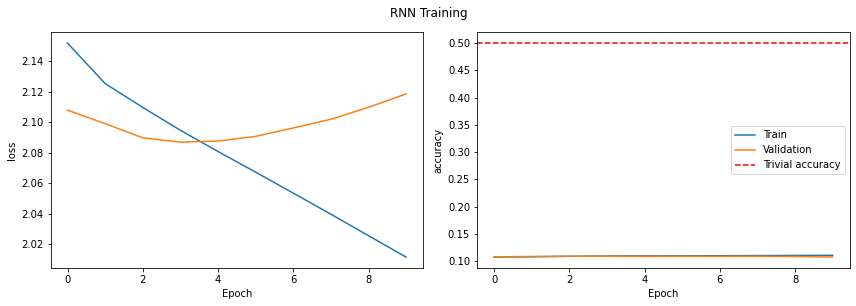

In [ ]:
# Your code here
def plot_history(history, name):
    fig, ax = plt.subplots(1,2, figsize=(12,4))
    for i, metric in enumerate(['loss', 'accuracy']): 
        ax[i].plot(history.history[metric], label='Train')
        ax[i].plot(history.history['val_'+metric], label='Validation')
        if metric == 'accuracy': ax[i].axhline(0.5, c='r', ls='--', label='Trivial accuracy')
        ax[i].set_xlabel('Epoch')
        ax[i].set_ylabel(metric)
    plt.suptitle(f'{name} Training', y=1.05)
    plt.legend()
    plt.tight_layout()

plot_history(history, 'RNN')

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

### **3.4 [9 points] PREDICTING THE NEXT WORD**
    
<br />
    
**3.4.1** - Read the dataset `pp_text.csv`. Add the start and end tokens to each line and tokenize it. Convert each sentence to a sequence vector and post-pad to a length of 30. This will be the input for the prediction phase.
<br /><br />
    
</div>

*If you are using colab, the code in the next cell will help download the dataset directly onto your workspace.*

In [ ]:
# Uncomment if you are using colab
# !gdown --id "1xeQ4w0iYJimzth0e3t3dQJbeuCsFlxVa"

In [ ]:
model = load_model('/content/drive/MyDrive/UnivAI/Univ AI 3/models/rnn_20epochs')

In [ ]:
# Your code here
pp_text_df = pd.read_csv("/content/drive/MyDrive/UnivAI/Univ AI 3/pp_text.csv")
pp_text_df.columns=['text']
pp_text_df.head()

,text
0,When you make changes please always check if e...
1,I found them very similar
2,Give some overview of what the exercises are a...
3,Honestly I do not remember
4,Can you check the video


In [ ]:
pp_text_clean = clean_data(pp_text_df)
pp_text_clean.head()

,text
0,<s> when you make changes please always check ...
1,<s> i found them very similar </s>
2,<s> give some overview of what the exercises a...
3,<s> honestly i do not remember </s>
4,<s> can you check the video </s>


In [ ]:
pp_text_seq_df=pd.DataFrame()
pp_text_seq_df['text'] = tok.texts_to_sequences(pp_text_clean.text)

In [ ]:
pp_text_seq_df.head()

,text
0,"[1, 1041, 232, 29, 1229, 511, 115, 774, 374, 1..."
1,"[1, 53, 159, 191, 1503, 695, 2]"
2,"[1, 102, 1267, 597, 434, 10, 872, 95, 648, 148..."
3,"[1, 1175, 53, 466, 302, 280, 2]"
4,"[1, 1913, 232, 774, 10, 331, 2]"


<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">


**3.4.2** - For predicting the next word, use the trained RNN model from above. 

NOTE - Based on your implementation, the output of the RNN model might have to be different from that of your trained network. You can make use of Keras function API for this.
<br /><br />


    
</div>

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

**3.4.3** - Choose any sentence from the list of Pavlos' texts to predict the next word. Input this to the RNN model built for prediction and print the predicted word. Try this out with multiple sentences.
<br /><br />
    
</div>

In [ ]:
idx=3
print("Actual sentence: ",pp_text_df.text[idx])
print("Sentence sequence: ", pp_text_seq_df.text[idx])

Actual sentence:  Honestly I do not remember
Sentence sequence:  [1, 1175, 53, 466, 302, 280, 2]


In [ ]:
# Your code here
y_test_pred = model.predict(pp_text_seq_df.text[idx][:-2], batch_size=1)

In [ ]:
y_test_pred.shape

(5, 1, 5000)

In [ ]:
last_word_seq = np.argmax(y_test_pred,axis=2)[-1]

In [ ]:
predicted_word = tok.sequences_to_texts([last_word_seq])[0]
print("predicted last word = ", predicted_word)

predicted last word =  film


<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

**3.4.4** - Do you notice any pattern in the predicted words? Do they seem approriate to the context of the texts as you understand it? What do you attribute this discrepency to? How can you resolve it?

Answer in less than 150 words.
<br /><br />
    
</div>

#### The results are not exactly in the context of the pp_text, but it is because the last words in pp_text have occured in altogether a different context while training the model with imdb data, hence the predictions are made accordingly.

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">


### **3.5 [6 points] TRAINING AND PREDICTING WITH A DIFFERENT DATASET**
<br />
    
**3.5.1** - Read the dataset `cleaned_sarcasm.csv`. This dataset has been preprocessed for you, all you need to do is tokenize, convert to sequence and pad it, similar to 3.2.1, 3.2.2 and 3.3.1.
<br /><br />
    
</div>

*If you are using colab, the code in the next cell will help download the dataset directly onto your workspace.*

In [ ]:
# Uncomment if you are using colab
# !gdown --id "1pMUuhoKsZVnktosQRuqAutfd3J4sFUsa"


In [ ]:
# Your code here
sarcasm_data_path = "/content/drive/MyDrive/UnivAI/Univ AI 3/cleaned_sarcasm.csv"
sarcasm_data = pd.read_csv(sarcasm_data_path)

In [ ]:
sarcasm_data.head()

,text
0,you do know west teams play against west teams...
1,they were underdogs earlier today but since gr...
2,this meme isnt funny none of the new york nigg...
3,i dont pay attention to her but as long as she...
4,you dont have to you have a good build buy gam...


<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

**3.5.2** - Train your RNN model with this data and plot the train and validation trace plot. This part is similar to 3.3.2, 3.3.3 and 3.3.4.
<br /><br />
    
</div>

In [ ]:
# Your code here
sarcasm_clean_df = clean_data(new_df)
sarcasm_clean_df.head()

,text
0,<s> first think another disney movie might goo...
1,<s> watch it cant help enjoy it </s>
2,<s> ages love movie </s>
3,<s> first saw movie years later still love i...
4,<s> danny glover superb could play part better...


In [ ]:
sarcasm_tok = Tokenizer(num_words=5000, filters='')

In [ ]:
# Your code here
sarcasm_seq_df = pd.DataFrame()
sarcasm_tok.fit_on_texts(sarcasm_clean_df.text)
sarcasm_seq_df['text'] =sarcasm_tok.texts_to_sequences(sarcasm_clean_df.text)

In [ ]:
sarcasm_seq_df.head()

,text
0,"[1, 25, 33, 75, 823, 4, 139, 9, 8, 266, 4, 2]"
1,"[1, 35, 15, 89, 239, 259, 15, 2]"
2,"[1, 1851, 45, 4, 2]"
3,"[1, 25, 113, 4, 63, 193, 50, 45, 15, 2]"
4,"[1, 1616, 3407, 830, 30, 207, 85, 51, 2]"


In [ ]:
X_train_sarcasm = sarcasm_seq_df.text.apply(remove_a_word)
y_train_sarcasm = sarcasm_seq_df.text.apply(remove_a_word, first=True)

In [ ]:
# Your code here
X_train_sarcasm = sequence.pad_sequences(X_train_sarcasm.values, maxlen=30, padding='post')
y_train_sarcasm = sequence.pad_sequences(y_train_sarcasm.values, maxlen=30, padding='post')

In [ ]:
embedding_size=300
vocabulary_size = 5000

model2 = Sequential()

model2.add(Embedding(vocabulary_size, embedding_size, mask_zero=True, name='embedding'))
model2.add(SimpleRNN(128, return_sequences=True, name='RNN_1'))
model2.add(SimpleRNN(64, return_sequences=True, name='RNN_2'))
model2.add(Dense(vocabulary_size, activation='softmax', name='dense'))

In [ ]:
model2.compile(optimizer="Adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 300)         1500000   
_________________________________________________________________
RNN_1 (SimpleRNN)            (None, None, 128)         54912     
_________________________________________________________________
RNN_2 (SimpleRNN)            (None, None, 64)          12352     
_________________________________________________________________
dense (Dense)                (None, None, 5000)        325000    
Total params: 1,892,264
Trainable params: 1,892,264
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history2 = model2.fit(X_train_sarcasm,y_train_sarcasm, epochs=10, validation_split=0.2, batch_size=64,verbose=1);

Epoch 1/10
1412/1412 [==============================] - 138s 96ms/step - loss: 2.1904 - accuracy: 0.1056 - val_loss: 2.1099 - val_accuracy: 0.1081
Epoch 2/10
1412/1412 [==============================] - 135s 95ms/step - loss: 2.1291 - accuracy: 0.1082 - val_loss: 2.1001 - val_accuracy: 0.1085
Epoch 3/10
1412/1412 [==============================] - 136s 96ms/step - loss: 2.1123 - accuracy: 0.1086 - val_loss: 2.0914 - val_accuracy: 0.1091
Epoch 4/10
1412/1412 [==============================] - 137s 97ms/step - loss: 2.0937 - accuracy: 0.1096 - val_loss: 2.0878 - val_accuracy: 0.1095
Epoch 5/10
1412/1412 [==============================] - 136s 96ms/step - loss: 2.0742 - accuracy: 0.1101 - val_loss: 2.0880 - val_accuracy: 0.1091
Epoch 6/10
1412/1412 [==============================] - 134s 95ms/step - loss: 2.0638 - accuracy: 0.1102 - val_loss: 2.0911 - val_accuracy: 0.1091
Epoch 7/10
1412/1412 [==============================] - 137s 97ms/step - loss: 2.0502 - accuracy: 0.1102 - val_loss: 2

In [ ]:
model2.save('/content/drive/MyDrive/UnivAI/Univ AI 3/models/model2_rnn_10epochs')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/UnivAI/Univ AI 3/models/model2_rnn_10epochs/assets


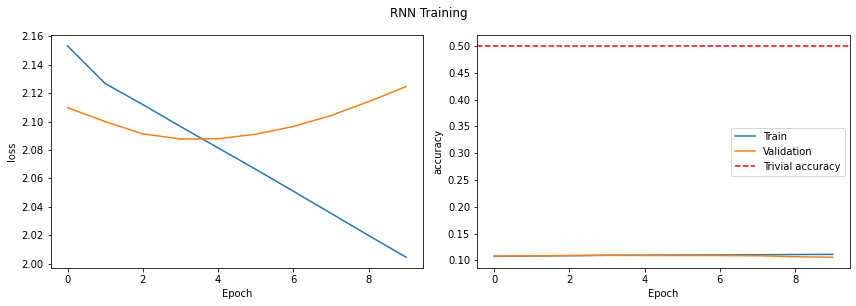

In [ ]:
# Your code here
def plot_history(history, name):
    fig, ax = plt.subplots(1,2, figsize=(12,4))
    for i, metric in enumerate(['loss', 'accuracy']): 
        ax[i].plot(history.history[metric], label='Train')
        ax[i].plot(history.history['val_'+metric], label='Validation')
        if metric == 'accuracy': ax[i].axhline(0.5, c='r', ls='--', label='Trivial accuracy')
        ax[i].set_xlabel('Epoch')
        ax[i].set_ylabel(metric)
    plt.suptitle(f'{name} Training', y=1.05)
    plt.legend()
    plt.tight_layout()

plot_history(history2, 'RNN')

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

**3.5.3** - Repeat 3.4.1, 3.4.2 and 3.4.3 with the RNN model trained using the new dataset.
<br /><br />

</div>

In [ ]:
# Your code here
pp_text_df = pd.read_csv("/content/drive/MyDrive/UnivAI/Univ AI 3/pp_text.csv")
pp_text_df.columns=['text']
pp_text_df.head()

,text
0,When you make changes please always check if e...
1,I found them very similar
2,Give some overview of what the exercises are a...
3,Honestly I do not remember
4,Can you check the video


In [ ]:
pp_text_clean = clean_data(pp_text_df)
pp_text_seq_df=pd.DataFrame()
pp_text_seq_df['text'] = tok.texts_to_sequences(pp_text_clean.text)
pp_text_seq_df.head()


,text
0,"[1, 1041, 232, 29, 1229, 511, 115, 774, 374, 1..."
1,"[1, 53, 159, 191, 1503, 695, 2]"
2,"[1, 102, 1267, 597, 434, 10, 872, 95, 648, 148..."
3,"[1, 1175, 53, 466, 302, 280, 2]"
4,"[1, 1913, 232, 774, 10, 331, 2]"


In [ ]:
idx=3
print("Actual sentence: ",pp_text_df.text[idx])
print("Sentence sequence: ", pp_text_seq_df.text[idx])

Actual sentence:  Honestly I do not remember
Sentence sequence:  [1, 1175, 53, 466, 302, 280, 2]


In [ ]:
# Your code here
y_test_pred = model2.predict(pp_text_seq_df.text[idx][:-2], batch_size=1)

In [ ]:
last_word_seq = np.argmax(y_test_pred,axis=2)[-1]

In [ ]:
predicted_word = tok.sequences_to_texts([last_word_seq])[0]
print("predicted last word = ", predicted_word)

predicted last word =  movie


<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

**3.5.4** - How do the results with the new dataset compare to the previous ones? Why do you think so? 

Answer in less than 100 words.
<br /><br />
    
</div>

Predictions are almost similar, this is because the last word in the pp_text often ends up occuring together with similar set of words in both imbd and sarcasm data.

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">


### **3.6 [3 points] COMPLETING THE SENTENCE**
<br />

**3.6.1** Until now we have predicted a single word for a given sentence. However, what if he meant more than one word when he typed in `...`

We will now predict multiple words for each input sentence. To do this we will first predict one word, append this word to the input text and then predict one more with the updated input. Continue doing this for 5 words or until the end token `</s>` (whichever comes first). 
<br /><br />

</div>

In [ ]:
input_sent = pp_text_seq_df.text[idx][:-2]

In [ ]:
input_sent.append(4)

In [ ]:
input_sent

[1, 1175, 53, 466, 302, 4]

In [ ]:
pp_text_seq_df.text[idx][:-2]

[1, 1175, 53, 466, 302]

In [ ]:
# Your code here
def predict_word_seq(estimator, sent_idx):
  pred_sent = []
  idx=sent_idx
  input_sent = pp_text_seq_df.text[idx][:-2]
  for i in range(5):
    y_test_pred = estimator.predict(input_sent, batch_size=1)
    last_word_seq = np.argmax(y_test_pred,axis=2)[-1]
    input_sent.append(last_word_seq[0])
    last_word = tok.sequences_to_texts([last_word_seq])[0]
    pred_sent.append(last_word)
    if last_word == '</s>':
      break
  return pred_sent

In [ ]:
sent_idx = 4
pred_sent = predict_word_seq(model, sent_idx)
print("Actual sentence: ",pp_text_df.text[sent_idx])
print("Predicted word sequence with model1 = ", " ".join(pred_sent))

Actual sentence:  Can you check the video
Predicted word sequence with model1 =  also performance </s>


In [ ]:
sent_idx = 4
pred_sent = predict_word_seq(model2, sent_idx)
print("Actual sentence: ",pp_text_df.text[sent_idx])
print("Predicted word sequence with model2 = ", " ".join(pred_sent))

Actual sentence:  Can you check the video
Predicted word sequence with model2 =  also like movies seen times


<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

### **3.7 [3 points] HOMEWORK QUIZ**
<br />
After attempting this part of the homework, answer the questions on edStem. All the questions depend on this part of the homework and you will not be able to answer them without attempting this part.
<br /><br />

</div>

#### Answer the questions on edStem